# ***Task-03***
# ***"To predict Whether a clinet has subscribed a term deposit or Not."***

I have used **bank-full.csv as Training Data and bank.csv as Test Data**.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/bank-full.csv',delimiter=";")
test=pd.read_csv('/content/bank.csv',delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
print(df.shape)
print(df.info())

(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [5]:
encode=["job",'marital','education',"default",
        "housing","loan","contact","month","poutcome","y"]
le = LabelEncoder()
for i in encode:
  df[i] = le.fit_transform(df[i])
  test[i] = le.fit_transform(test[i])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


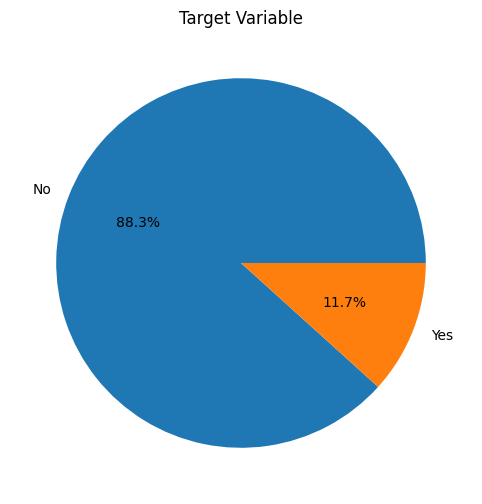

In [6]:
val=[df.y.value_counts(normalize=True)[i]*100 for i in range(2)]
plt.figure(figsize=(10,6))
plt.pie(val,labels=['No','Yes'],autopct='%1.1f%%')
plt.title('Target Variable')
plt.show()

**It is imbalanced data;**

# ***Using SMOTE(UPSampling Technique)***

In [7]:
xtrain=df.iloc[:,:-1]
ytrain=df.iloc[:,-1]

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(xtrain, ytrain)

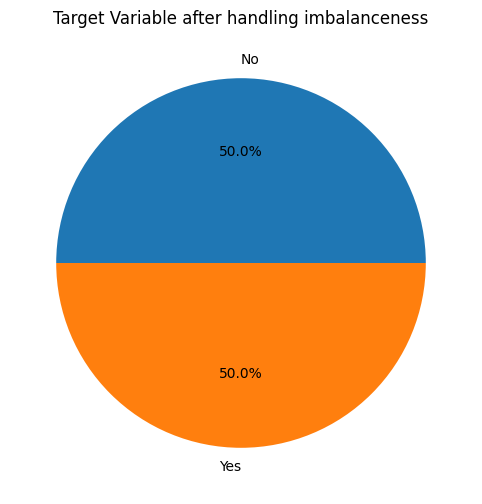

In [9]:
y_train_resampled.value_counts()
val=[y_train_resampled.value_counts(normalize=True)[i]*100 for i in range(2)]
plt.figure(figsize=(10,6))
plt.pie(val,labels=['No','Yes'],autopct='%1.1f%%')
plt.title('Target Variable after handling imbalanceness')
plt.show()

In [10]:
xt,xd,yt,yd=train_test_split(x_train_resampled,y_train_resampled,test_size=0.2,random_state=42)

Accuracy:89.55476235205711


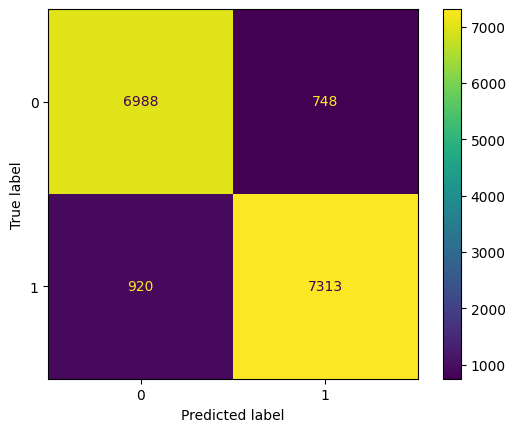

In [11]:
dt=DecisionTreeClassifier()
dt.fit(xt,yt)
y_pred=dt.predict(xd)
print(f"Accuracy:{accuracy_score(y_pred,yd)*100}")
ConfusionMatrixDisplay.from_predictions(y_pred,yd)
plt.show()

# ***Hyperparameter Tuning***

In [12]:
val=[]
max_f=[i for i in range(1,17,3)]
min_s_s=[i for i in range(2,17,4)]
max_d=[i for i in range(1,14,2)]
min_s_l=[i for i in range(2,11,2)]
for i in max_f:
  for j in min_s_s:
    for k in min_s_l:
      for l in max_d:
        dt=DecisionTreeClassifier(max_features=i,min_samples_split=j,min_samples_leaf=k,max_depth=l,random_state=32)
        dt.fit(xt,yt)
        y_pred=dt.predict(xd)
        #print(confusion_matrix(y_pred,yd))
        print(f"max_features={i},min_samples_split={j},min_samples_leaf={k},max_depth={l},acc_score={accuracy_score(y_pred,yd)*100}%")
        val.append((i,j,k,l,accuracy_score(y_pred,yd)*100))
val.sort(key=lambda x:x[4],reverse=True)


max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=1,acc_score=59.80336902749076%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=3,acc_score=68.01302523639552%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=5,acc_score=72.09593587575928%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=7,acc_score=73.56753710313733%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=9,acc_score=78.94670924917027%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=11,acc_score=82.10908635481245%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=13,acc_score=79.53534974012149%
max_features=1,min_samples_split=2,min_samples_leaf=4,max_depth=1,acc_score=59.80336902749076%
max_features=1,min_samples_split=2,min_samples_leaf=4,max_depth=3,acc_score=68.01302523639552%
max_features=1,min_samples_split=2,min_samples_leaf=4,max_depth=5,acc_score=72.09593587575928%
max_features=1,min_samples_split=2,min_samples_l

# ***Best Value of HyperParameter***

In [13]:
print(f"max_features={val[0][0]},min_samples_split={val[0][1]},min_samples_leaf={val[0][2]},max_depth={val[0][3]}")

max_features=13,min_samples_split=2,min_samples_leaf=2,max_depth=13


# ***Result After Hyperparameter Tuning after doing upsampling***

Accuracy:89.45456822593776


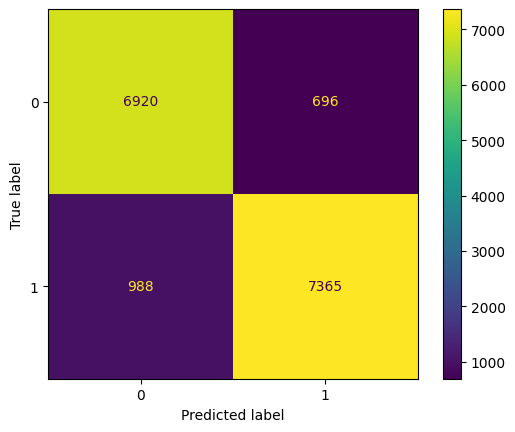

In [14]:
dt=DecisionTreeClassifier(max_features=13,min_samples_split=2,min_samples_leaf=2,max_depth=13,random_state=32)
dt.fit(xt,yt)
y_pred=dt.predict(xd)
print(f"Accuracy:{accuracy_score(y_pred,yd)*100}")
ConfusionMatrixDisplay.from_predictions(y_pred,yd)
plt.show()

# ***Work On Imbalanced Data***

In [15]:
cl_n=df[df['y']==0]
cl_y=df[df['y']==1]

In [16]:
train_n,dev_n=train_test_split(cl_n,test_size=0.2,random_state=42)
train_y,dev_y=train_test_split(cl_y,test_size=0.2,random_state=42)
train=pd.concat([train_n,train_y])
dev=pd.concat([dev_n,dev_y])

In [17]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
x_dev=dev.iloc[:,:-1]
y_dev=dev.iloc[:,-1]


87.10604887758487


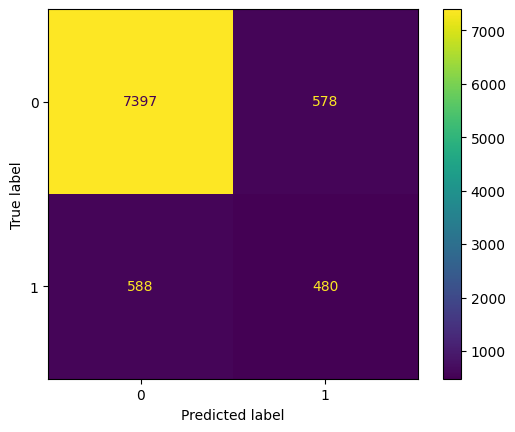

In [18]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_dev)
print(accuracy_score(y_pred,y_dev)*100)
ConfusionMatrixDisplay.from_predictions(y_pred,y_dev)
plt.show()

# ***Hyperparameter Tuning***

In [19]:
val1=[]#max_depth=6,max_features=14,min_samples_split=12
max_f=[i for i in range(1,17,2)]
min_s_s=[i for i in range(2,17,4)]
max_d=[i for i in range(1,14,2)]
min_s_l=[i for i in range(2,11,2)]
for i in max_f:
  for j in min_s_s:
    for k in min_s_l:
      for l in max_d:
        dt=DecisionTreeClassifier(max_features=i,min_samples_split=j,min_samples_leaf=k,max_depth=l,random_state=32)
        dt.fit(x_train,y_train)
        y_pred=dt.predict(x_dev)
        #print(confusion_matrix(y_pred,yd))
        print(f"max_features={i},min_samples_split={j},min_samples_leaf={k},max_depth={l},acc_score={accuracy_score(y_pred,y_dev)*100}%")
        val1.append((i,j,k,l,accuracy_score(y_pred,y_dev)*100))
val1.sort(key=lambda x:x[4],reverse=True)

max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=1,acc_score=88.30034280659073%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=3,acc_score=88.36669246931328%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=5,acc_score=88.06811898706182%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=7,acc_score=88.38880902355413%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=9,acc_score=88.57679973460135%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=11,acc_score=88.80902355413026%
max_features=1,min_samples_split=2,min_samples_leaf=2,max_depth=13,acc_score=88.65420767444432%
max_features=1,min_samples_split=2,min_samples_leaf=4,max_depth=1,acc_score=88.30034280659073%
max_features=1,min_samples_split=2,min_samples_leaf=4,max_depth=3,acc_score=88.36669246931328%
max_features=1,min_samples_split=2,min_samples_leaf=4,max_depth=5,acc_score=88.07917726418223%
max_features=1,min_samples_split=2,min_samples_l

# ***Best Value of HyperParameter***

In [20]:
print(f"max_features={val1[0][0]},min_samples_split={val1[0][1]},min_samples_leaf={val1[0][2]},max_depth={val1[0][3]}")

max_features=5,min_samples_split=14,min_samples_leaf=2,max_depth=9


Result After Hyperparameter Tuning

90.23554130266504


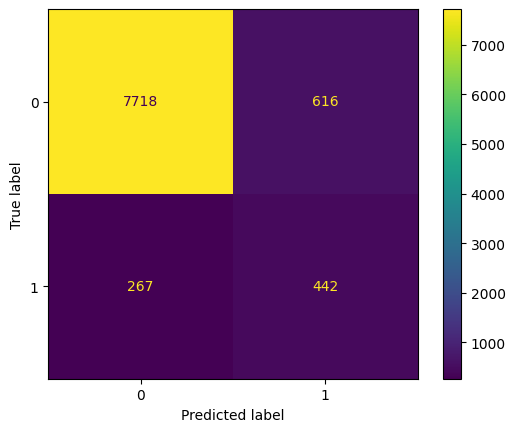

In [21]:
dt=DecisionTreeClassifier(max_features=5,min_samples_split=14,min_samples_leaf=2,max_depth=9,random_state=32)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_dev)
print(accuracy_score(y_pred,y_dev)*100)
ConfusionMatrixDisplay.from_predictions(y_pred,y_dev)
plt.show()

So,we get the **best model without upsampling**, and the values of hyperparameter is **"max_features=5,min_samples_split=14,min_samples_leaf=2,max_depth=9,random_state=32 "**

# ***Best Model***

In [22]:
Final_model=DecisionTreeClassifier(max_features=5,min_samples_split=14,min_samples_leaf=2,max_depth=9,random_state=32)
Final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features=5, min_samples_leaf=2,
                       min_samples_split=14, random_state=32)

# ***Training accuracy_score***

In [23]:
y=Final_model.predict(xtrain)
print(f'Trained Accuracy:{accuracy_score(y,ytrain)*100}%')

Trained Accuracy:91.09066377651457%


# ***Testing accuracy_score***

In [24]:
xtest=test.iloc[:,:-1]
ytest=test.iloc[:,-1]
y = Final_model.predict(xtest)
print(f'Trained Accuracy: {accuracy_score(y, ytest) * 100}%')
print(f"classification_report:\n")
print(f"{classification_report(y, ytest)}")

Trained Accuracy: 91.06392391063925%
classification_report:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4182
           1       0.44      0.67      0.53       339

    accuracy                           0.91      4521
   macro avg       0.70      0.80      0.74      4521
weighted avg       0.93      0.91      0.92      4521



# ***Confusion Matrix***

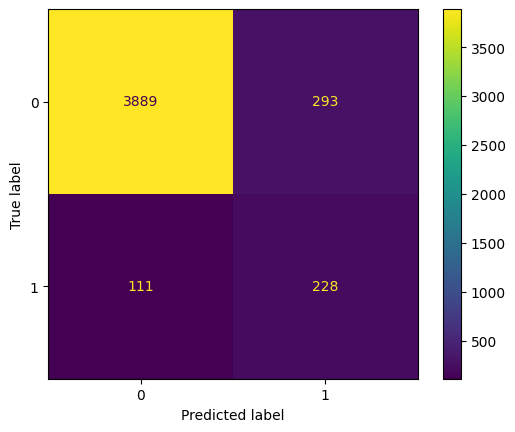

In [25]:
ConfusionMatrixDisplay.from_predictions(y,ytest)
plt.show()

# ***ThAnK YoU!***